In [1]:
import numpy as np
import pandas as pd
import json
import requests
import ast

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from imdb import IMDb
ia = IMDb()

In [2]:
from eric_keys import eric_omdb_key, eric_tmdb_key, eric_tmdb_token

# Data Manipulation, Stat Creation:


In [3]:
# Read primary csv to df
df = pd.read_csv('clean_df.csv', index_col='id').sort_index()
df['genre_names']=df['genre_names'].apply(lambda x: ast.literal_eval(x))
df['countries']=df['countries'].apply(lambda x: ast.literal_eval(x))

#### Top Five Languages by num of movies

In [4]:
##### Top Five Languages #####

# Create list of top languages by num of movies
language_count = dict(df['original_language'].value_counts())
language_count = [(key, value) for key, value in language_count.items()]

# Create dict for top five languages by num of movies
top_five_lang = {}
for x in language_count[0:5]:
    top_five_lang[x[0]] = {'movie_count':x[1]}

# Add mean vote count
for key, value in top_five_lang.items():
    top_five_lang[key]['mean_vote_count'] = int(round(
        df.groupby('original_language')['vote_count'].mean().loc[key]))
    
# Add median vote count
for key, value in top_five_lang.items():
    top_five_lang[key]['median_vote_count'] = int(round(
        df.groupby('original_language')['vote_count'].median().loc[key]))
    
# Add mean rating
for key, value in top_five_lang.items():
    top_five_lang[key]['mean_avg_vote'] = round(
        df.groupby('original_language')['avg_vote'].mean().loc[key], 1)
    
# Add median rating
for key, value in top_five_lang.items():
    top_five_lang[key]['median_avg_vote'] = round(
        df.groupby('original_language')['avg_vote'].median().loc[key], 1)
    
# Add mean vote by decade
for decade in ['90s', '00s', '10s']:
    for key, value in top_five_lang.items():
        filt1 = df[decade] == 1
        filt2 = df['original_language'] == key
        top_five_lang[key][f'{decade}_mean_vote'] = round(
            df.loc[filt1].loc[filt2]['avg_vote'].mean(), 1)
        
# Add median vote by decade
for decade in ['90s', '00s', '10s']:
    for key, value in top_five_lang.items():
        filt1 = df[decade] == 1
        filt2 = df['original_language'] == key
        top_five_lang[key][f'{decade}_median_vote'] = round(
            df.loc[filt1].loc[filt2]['avg_vote'].median(), 1)
        
# Add mean popularity by decade
for decade in ['90s', '00s', '10s']:
    for key, value in top_five_lang.items():
        filt1 = df[decade] == 1
        filt2 = df['original_language'] == key
        top_five_lang[key][f'{decade}_mean_popularity'] = round(
            df.loc[filt1].loc[filt2]['popularity'].mean(), 1)
        
# Add median popularity by decade
for decade in ['90s', '00s', '10s']:
    for key, value in top_five_lang.items():
        filt1 = df[decade] == 1
        filt2 = df['original_language'] == key
        top_five_lang[key][f'{decade}_median_popularity'] = round(
            df.loc[filt1].loc[filt2]['popularity'].median(), 1)

# Add mean budget by decade
for decade in ['90s', '00s', '10s']:
    for key, value in top_five_lang.items():
        filt1 = df[decade] == 1
        filt2 = df['original_language'] == key
        top_five_lang[key][f'{decade}_mean_budget'] = int(round(
            df.loc[filt1].loc[filt2]['budget'].mean()))
        
# Add median budget by decade
for decade in ['90s', '00s', '10s']:
    for key, value in top_five_lang.items():
        filt1 = df[decade] == 1
        filt2 = df['original_language'] == key
        top_five_lang[key][f'{decade}_median_budget'] = int(round(
            df.loc[filt1].loc[filt2]['budget'].median()))
        
# Add mean revenue by decade
for decade in ['90s', '00s', '10s']:
    for key, value in top_five_lang.items():
        filt1 = df[decade] == 1
        filt2 = df['original_language'] == key
        top_five_lang[key][f'{decade}_mean_revenue'] = int(round(
            df.loc[filt1].loc[filt2]['revenue'].mean()))
        
# Add median revenue by decade
for decade in ['90s', '00s', '10s']:
    for key, value in top_five_lang.items():
        filt1 = df[decade] == 1
        filt2 = df['original_language'] == key
        top_five_lang[key][f'{decade}_median_revenue'] = int(round(
            df.loc[filt1].loc[filt2]['revenue'].median()))
        
# Add mean profit by decade
for decade in ['90s', '00s', '10s']:
    for key, value in top_five_lang.items():
        filt1 = df[decade] == 1
        filt2 = df['original_language'] == key
        top_five_lang[key][f'{decade}_mean_profit'] = int(round(
            df.loc[filt1].loc[filt2]['profit'].mean()))
        
# Add median profit by decade
for decade in ['90s', '00s', '10s']:
    for key, value in top_five_lang.items():
        filt1 = df[decade] == 1
        filt2 = df['original_language'] == key
        top_five_lang[key][f'{decade}_median_profit'] = int(round(
            df.loc[filt1].loc[filt2]['profit'].median()))
        
# Add mean profit margin by decade
for decade in ['90s', '00s', '10s']:
    for key, value in top_five_lang.items():
        filt1 = df[decade] == 1
        filt2 = df['original_language'] == key
        top_five_lang[key][f'{decade}_mean_profit_margin'] = int(round(
            df.loc[filt1].loc[filt2]['profit_margin'].mean()))
        
# Add median profit margin by decade
for decade in ['90s', '00s', '10s']:
    for key, value in top_five_lang.items():
        filt1 = df[decade] == 1
        filt2 = df['original_language'] == key
        top_five_lang[key][f'{decade}_median_profit_margin'] = int(round(
            df.loc[filt1].loc[filt2]['profit_margin'].median()))

In [5]:
# Create language count df for plotting
lang_count_df = pd.DataFrame(language_count, columns=['language', 'count'])
lang_count_df.set_index('language', inplace=True)

In [6]:
# Create language df for plotting
top_five_df = pd.DataFrame.from_dict(top_five_lang,orient='index')

In [7]:
#Make a dataframe with all genres as columns where 1 and 0 mean True or False
genre_df=df['genre_names'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


# Data Visualizations:

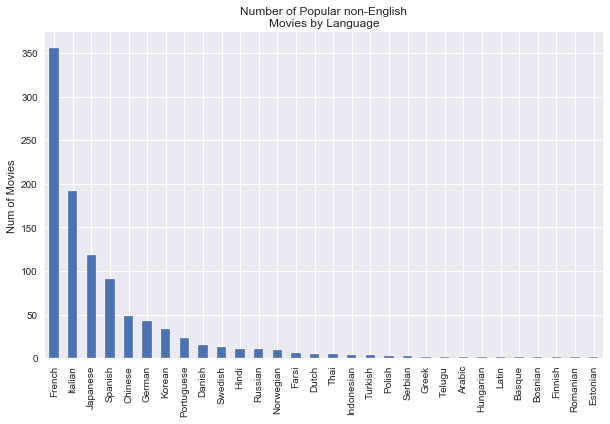

In [8]:
# Plot number of popular movies by language
lang_count_df.plot(kind='bar', legend=False, figsize=(10,6))
plt.title('Number of Popular non-English\nMovies by Language')
plt.xlabel(None)
plt.ylabel('Num of Movies')
plt.show()

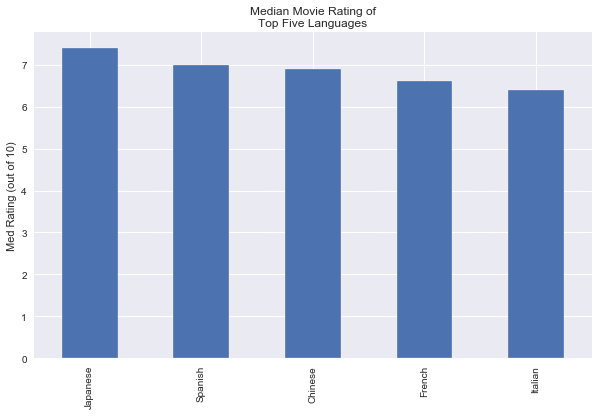

In [9]:
# Plot median rating by language
top_five_df['median_avg_vote'].sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Median Movie Rating of\nTop Five Languages')
plt.xlabel(None)
plt.ylabel('Med Rating (out of 10)')
plt.show()

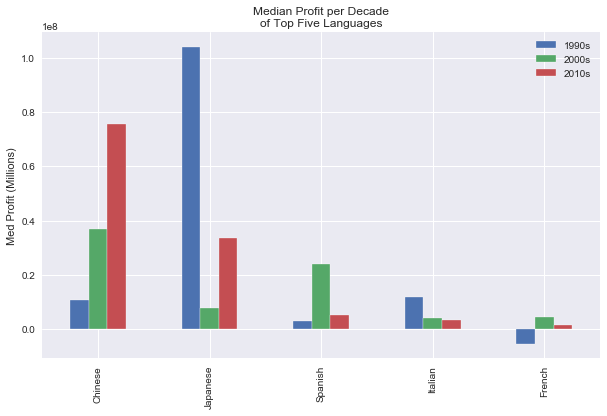

In [10]:
# Plot median profit per decade for top 5 languages
top_five_df[['90s_median_profit', '00s_median_profit', '10s_median_profit']].sort_values(
    by='10s_median_profit',ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Median Profit per Decade\nof Top Five Languages')
plt.ylabel('Med Profit (Millions)')
plt.legend(labels=['1990s', '2000s', '2010s'])
plt.show()

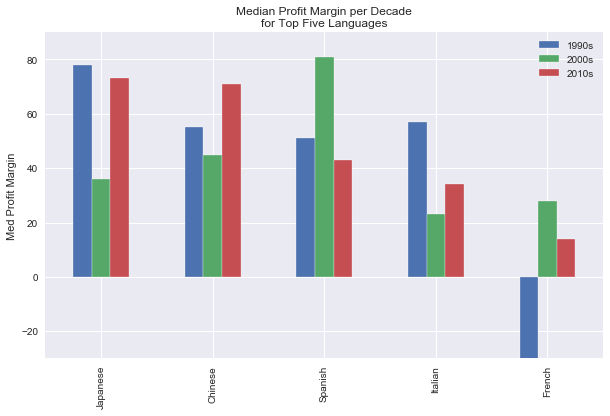

In [11]:
# Plot median profit margin per decade for top 5 languages
top_five_df[['90s_median_profit_margin', '00s_median_profit_margin', '10s_median_profit_margin']].sort_values(
    by='10s_median_profit_margin',ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Median Profit Margin per Decade\nfor Top Five Languages')
plt.ylabel('Med Profit Margin')
plt.legend(labels=['1990s', '2000s', '2010s'])
plt.ylim(-30,90)
plt.show()